In [7]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Import File
opfd= pd.read_csv(r'C:\Users\eludi\OneDrive\Desktop\Portfolio\opfd.csv')

In [17]:
# Using 6 features and the target variable
opfd = opfd[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]
opfd

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,181.00,181.00,0.00,0.00,0.00,1,0
3,181.00,181.00,0.00,21182.00,0.00,1,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0


In [18]:
opfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [19]:
opfd.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [20]:
# Counting Fraud nad non fraudulent transactions
opfd['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [21]:
# setting variable X  by dropping the diagnosis column and retaining all others

X = opfd.drop('isFraud',axis=1)


#Load the target variable to y
y = opfd['isFraud']

In [22]:
# The train/test split 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [36]:
# Training the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (solver='liblinear')
classifier.fit(X_train,y_train)

C:\Users\eludi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='liblinear')

In [25]:
# Predicting the test set
y_predict = classifier.predict(X_test)

In [13]:
Results = pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
6322570,0,0
3621196,0,0
1226256,0,0
2803274,0,0
3201247,0,0
3681019,0,0
1351584,0,0
5422829,0,0
5870912,0,0
2400263,0,0


In [26]:
# Computing the Model Accuracy.

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9992524044078278


In [27]:
# Finding the  training set model accuracy.

# Get the predictions from the model for the training set.

y_train_pred = classifier.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

0.9992803952729267


In [28]:
#  probability predictions from the model.
y_test_proba = classifier.predict_proba(X_test)

print(y_test_proba.shape)

(1908786, 2)


In [29]:
y_test_proba[0:5,:]

array([[9.90914469e-01, 9.08553138e-03],
       [5.78209055e-01, 4.21790945e-01],
       [6.83086498e-01, 3.16913502e-01],
       [9.99999508e-01, 4.91585075e-07],
       [9.99693434e-01, 3.06566184e-04]])

In [30]:
import numpy as np

# Array in scientific notation
array_in_scientific = y_test_proba[0:5,:]

# Converting arrary to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['0.9909144686237613' '0.0090855313762387']
 ['0.5782090546585665' '0.4217909453414334']
 ['0.6830864978029458' '0.3169135021970542']
 ['0.9999995084149247' '0.0000004915850753']
 ['0.9996934338162200' '0.0003065661837800']]


In [31]:
T = y_test_proba[:,1]
array_in_one = T

# Convert to normal number format
S = np.vectorize(lambda x: format(x, '.16f'))(array_in_one)

print(S)

['0.0090855313762387' '0.4217909453414334' '0.3169135021970542' ...
 '0.0000000000000000' '0.0000000000000000' '0.3897303181980364']


In [37]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob(Class = 1)':S})

Results.head(5)

,Actual,Predictions,Prob(Class = 1)
6322570,0,0,0.0090855313762387
3621196,0,0,0.4217909453414334
1226256,0,0,0.3169135021970542
2803274,0,0,0.0000004915850753
3201247,0,0,0.0003065661837800


In [38]:
# The Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[1905716     602]
 [    825    1643]]


Text(95.72222222222221, 0.5, 'True Label')

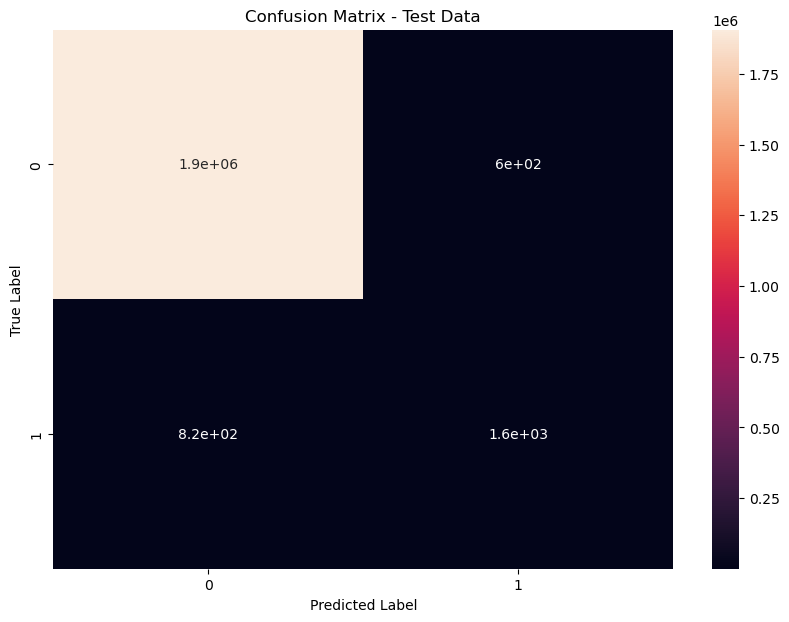

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

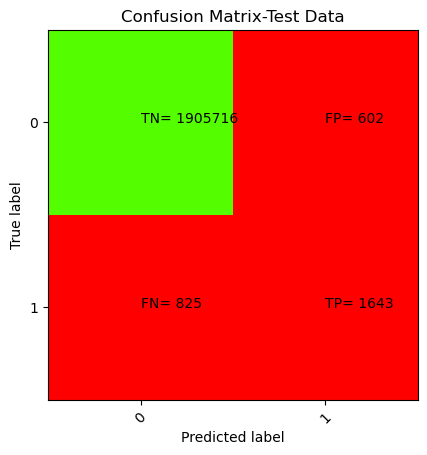

In [23]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.prism)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [39]:
#Calculating common error metrics for a 2-class classifier

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.73      0.67      0.70      2468

    accuracy                           1.00   1908786
   macro avg       0.87      0.83      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



In [41]:
# Calculate metrics values individually

# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [42]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.6657212317666127


In [43]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.7318485523385301


In [28]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  0.9996842079862857


In [44]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.9992524044078278
